In [77]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import seaborn as sns
from scipy import stats

# 그래프에서 한글 깨짐 방지
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams['axes.unicode_minus'] = False

sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})

## 분석 및 예측 모델 
0. 데이터 수집
1. 파이썬 <br>
시각화, 딕셔너리, 판다스, 로직, 흐름제어, 필터링, 반복구조  <br>
람다함수, 이터레이터, 리스트 내포  
2. 데이터 정제  <br>
정제 기술, EDA(탐색적 분석), VED(시각적 데이터 탐색)  <br>
피봇테이블, 데이터 결합, 누락값 처리 
3. 데이터 분석
판다스, 데이터 프레임 <br>
VED, 통계적 분석(상관계수), 시계열 인덱싱 <br>
테이터프레임 슬라이싱, 변환, 필터링, melt, 카테고리화 <br>
스택/언스택, 피봇 등
4. 데이터 시각화
seaborn, matplotlib 등
5. 머신러닝 & 딥러닝
신경망 → 한계 → RF, SVM → DL 이전의 모델도 적절하게 혼용 (ANN → CNN → RNN)

[Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand/data) <br>
분류/회귀? → 자전거 대여량 예측 = 회귀

In [7]:
train = pd.read_csv("./res/bike-sharing-demand/train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [11]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

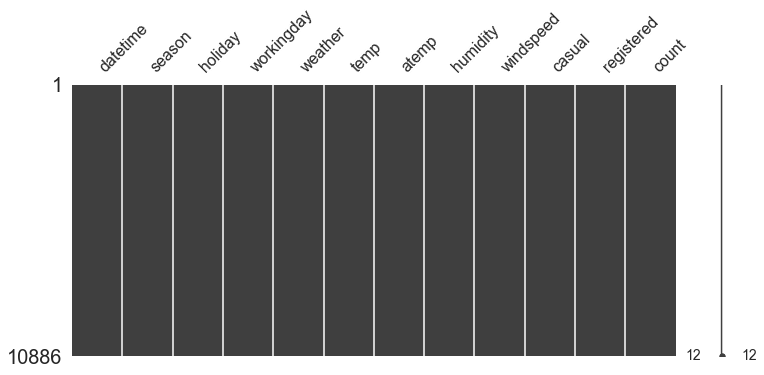

In [17]:
import missingno as msno
msno.matrix(train, figsize=(12, 5))

In [18]:
train.datetime 
# 연 월 일 → 일보다는 요일이 더 영향을 많이 끼칠 거 같다
# 시 (분 초)
# 각각을 개별의 열로 처리해야 더 정확도가 높은 결과를 얻을 수 있다

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
5       2011-01-01 05:00:00
6       2011-01-01 06:00:00
7       2011-01-01 07:00:00
8       2011-01-01 08:00:00
9       2011-01-01 09:00:00
10      2011-01-01 10:00:00
11      2011-01-01 11:00:00
12      2011-01-01 12:00:00
13      2011-01-01 13:00:00
14      2011-01-01 14:00:00
15      2011-01-01 15:00:00
16      2011-01-01 16:00:00
17      2011-01-01 17:00:00
18      2011-01-01 18:00:00
19      2011-01-01 19:00:00
20      2011-01-01 20:00:00
21      2011-01-01 21:00:00
22      2011-01-01 22:00:00
23      2011-01-01 23:00:00
24      2011-01-02 00:00:00
25      2011-01-02 01:00:00
26      2011-01-02 02:00:00
27      2011-01-02 03:00:00
28      2011-01-02 04:00:00
29      2011-01-02 06:00:00
                ...        
10856   2012-12-18 18:00:00
10857   2012-12-18 19:00:00
10858   2012-12-18 20:00:00
10859   2012-12-18 21:00:00
10860   2012-12-18 2

In [19]:
train["datetime"].dt.year # datetime 객체의 경우 예약어를 사용하여 접근가능

0        2011
1        2011
2        2011
3        2011
4        2011
5        2011
6        2011
7        2011
8        2011
9        2011
10       2011
11       2011
12       2011
13       2011
14       2011
15       2011
16       2011
17       2011
18       2011
19       2011
20       2011
21       2011
22       2011
23       2011
24       2011
25       2011
26       2011
27       2011
28       2011
29       2011
         ... 
10856    2012
10857    2012
10858    2012
10859    2012
10860    2012
10861    2012
10862    2012
10863    2012
10864    2012
10865    2012
10866    2012
10867    2012
10868    2012
10869    2012
10870    2012
10871    2012
10872    2012
10873    2012
10874    2012
10875    2012
10876    2012
10877    2012
10878    2012
10879    2012
10880    2012
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [21]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape

(10886, 18)

In [22]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### axes vs axis
<center><img src="https://user-images.githubusercontent.com/50861901/61600663-b256f700-ac6c-11e9-96bf-919bc293fbde.png" width="30%" height="30%"></center>

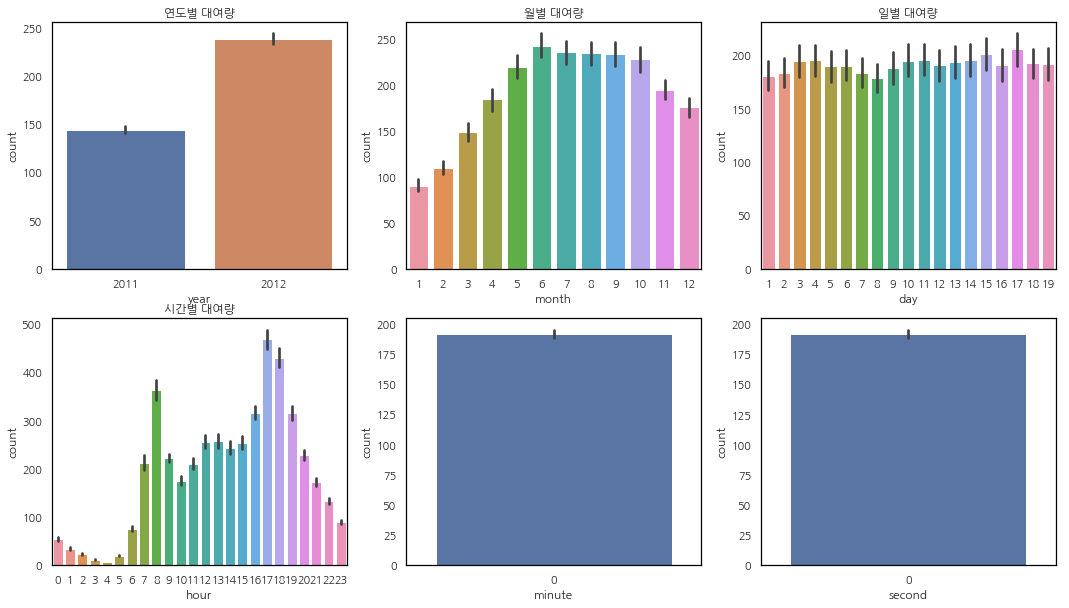

In [87]:
fig, ((ax1, ax2, ax3), [ax4, ax5, ax6]) = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(18, 10)
# (<Figure size 432x288 with 6 Axes>,
#  array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F7CB2CE2E8>,
#          <matplotlib.axes._subplots.AxesSubplot object at 0x000001F7CB179C88>,
#          <matplotlib.axes._subplots.AxesSubplot object at 0x000001F7CB3065F8>],
#         [<matplotlib.axes._subplots.AxesSubplot object at 0x000001F7CB440F60>,
#          <matplotlib.axes._subplots.AxesSubplot object at 0x000001F7CB547908>,
#          <matplotlib.axes._subplots.AxesSubplot object at 0x000001F7C99A52B0>]],
#        dtype=object))
# → 반환값이 2개라는 것을 할 수 있다
# Figure 객체, array 객체

# 그래프에서 한글 깨짐 방지
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams['axes.unicode_minus'] = False

sns.barplot(data=train, x="year", y="count", ax=ax1)
ax1.set(title="연도별 대여량")

sns.barplot(data=train, x="month", y="count", ax=ax2)
ax2.set(title="월별 대여량")

sns.barplot(data=train, x="day", y="count", ax=ax3)
ax3.set(title="일별 대여량")
# 거의 차이 없음 → 일별보다 요일별이 더 의미가 있을것이다

sns.barplot(data=train, x="hour", y="count", ax=ax4)
ax4.set(title="시간별 대여량")
# 휴일/ 평일을 구분 필요

sns.barplot(data=train, x="minute", y="count", ax=ax5)

sns.barplot(data=train, x="second", y="count", ax=ax6)

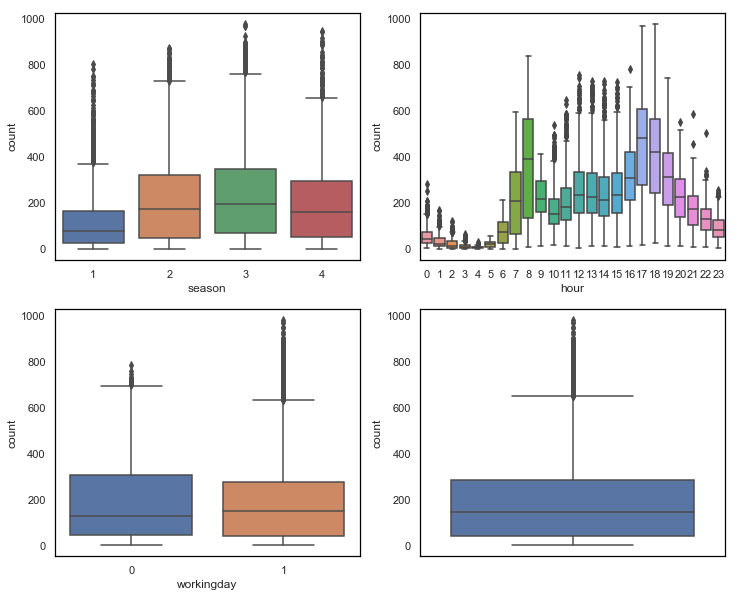

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=train, y="count", x="season", orient="v", ax=axes[0][0]) # 계절별 count 
sns.boxplot(data=train, y="count", x="hour", orient="v", ax=axes[0][1])
sns.boxplot(data=train, y="count", x="workingday", orient="v", ax=axes[1][0])
sns.boxplot(data=train, y="count", orient="v", ax=axes[1][1])

In [67]:
print (plt.rcParams['font.size'] ) 
print (plt.rcParams['font.family'] )

12.0
['sans-serif']


In [76]:
print (plt.rcParams['font.size'] ) 
print (plt.rcParams['font.family'] )

12.0
['NanumGothic']


In [79]:
train["dayofweek"] = train["datetime"].dt.dayofweek
train["dayofweek"].head(10) # 0: 월요일 6: 일요일

0    5
1    5
2    5
3    5
4    5
5    5
6    5
7    5
8    5
9    5
Name: dayofweek, dtype: int64

In [83]:
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

* 시간의 흐름에 따른 그래프 (0 - 23)
* 근무일의 여부에 따른 그래프 (0, 1)
* 요일에 따른 그래프 (0, 6)
* 계절에 따른 그래프 (1 - 4)

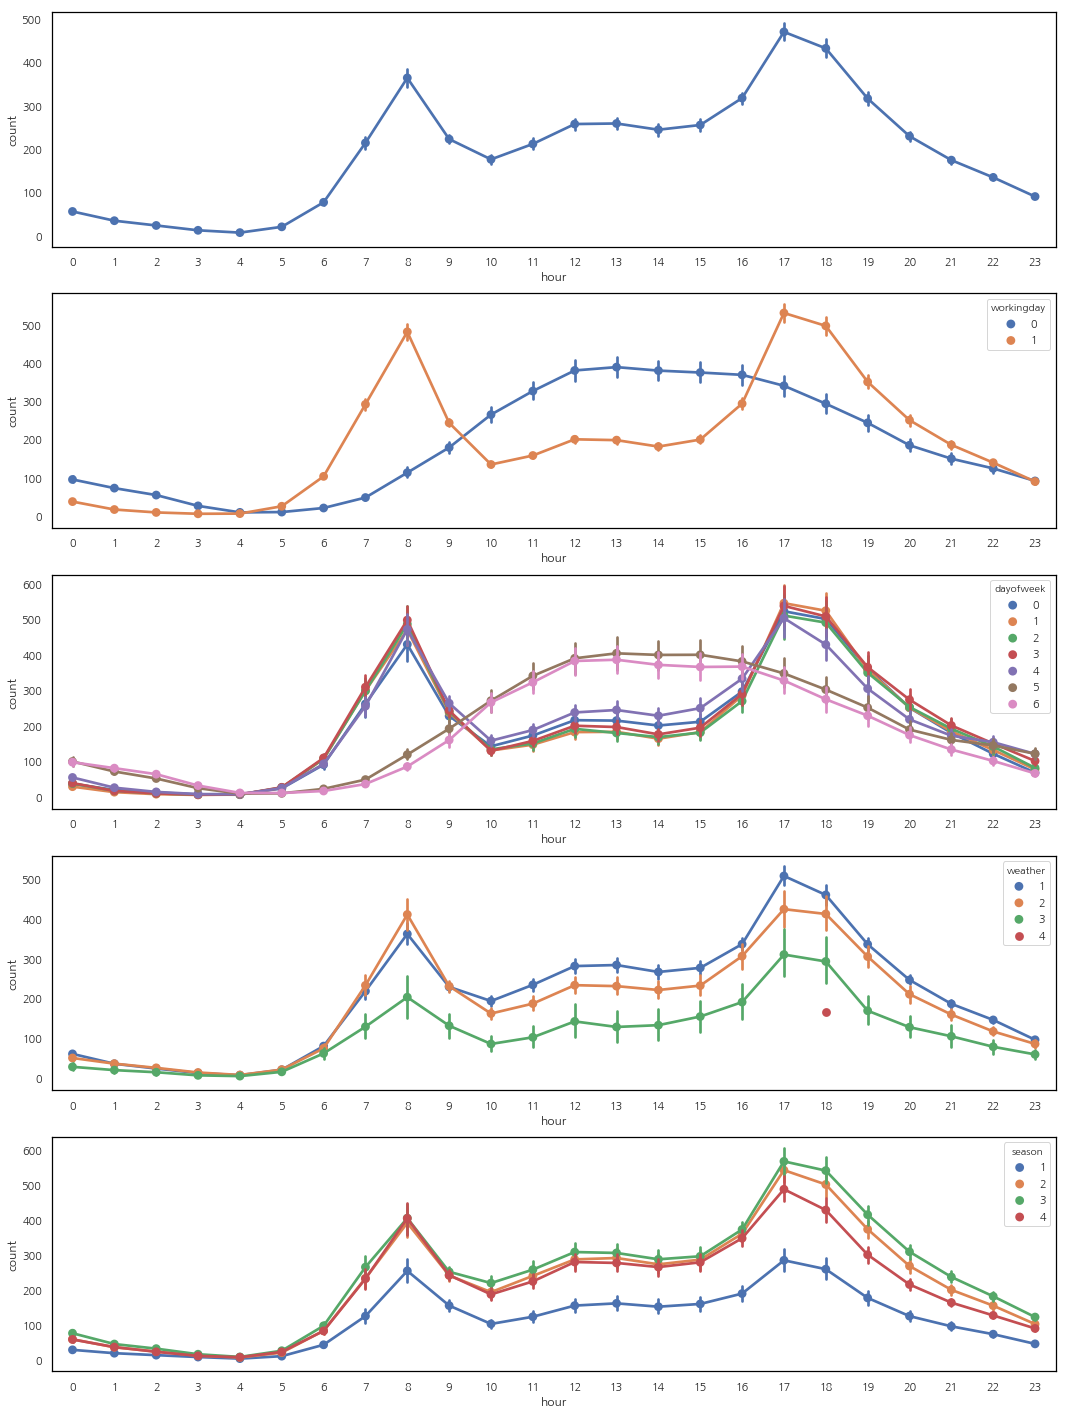

In [96]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18, 25)
# 각 시간에 따른 count의 합 → 출/ 퇴근 시간에 많다
sns.pointplot(data=train, x="hour", y="count", ax=ax1) # 점을 찍고 각 점을 선으로 이음
# 평일과 휴일의 사용 흐름이 다르다 → 0~2시에는 휴일에도 수요량이 있다
sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax2) 
sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3) 
sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4) # 날씨별
sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5) # 계절별

## 상관계수

In [97]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [108]:
corrMat = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMat = corrMat.corr() # +-1에 가까우면 영향이 큰 변수
corrMat

,temp,atemp,casual,registered,humidity,windspeed,count
temp,1.000000,0.984948,0.467097,0.318571,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,0.462067,0.314635,-0.043536,-0.057473,0.389784
casual,0.467097,0.462067,1.000000,0.497250,-0.348187,0.092276,0.690414
registered,0.318571,0.314635,0.497250,1.000000,-0.265458,0.091052,0.970948
humidity,-0.064949,-0.043536,-0.348187,-0.265458,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,0.092276,0.091052,-0.318607,1.000000,0.101369
count,0.394454,0.389784,0.690414,0.970948,-0.317371,0.101369,1.000000


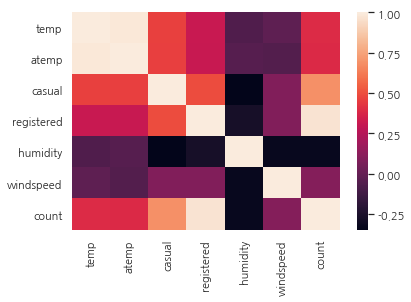

In [109]:
sns.heatmap(corrMat)

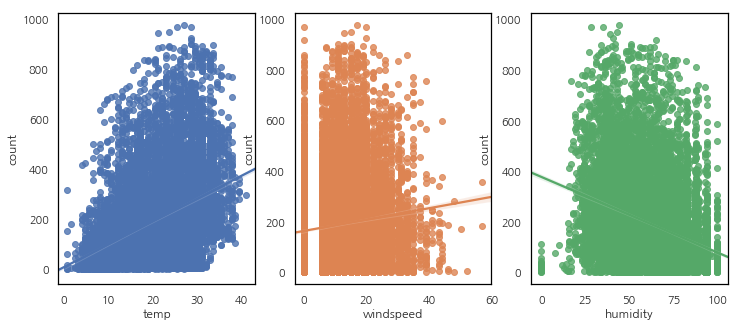

In [112]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=train, ax=ax1)
sns.regplot(x="windspeed", y="count", data=train, ax=ax2)
sns.regplot(x="humidity", y="count", data=train, ax=ax3)

In [113]:
mask = np.array(corrMat)
mask

array([[ 1.        ,  0.98494811,  0.46709706,  0.31857128, -0.06494877,
        -0.01785201,  0.39445364],
       [ 0.98494811,  1.        ,  0.46206654,  0.31463539, -0.04353571,
        -0.057473  ,  0.38978444],
       [ 0.46709706,  0.46206654,  1.        ,  0.49724969, -0.3481869 ,
         0.09227619,  0.69041357],
       [ 0.31857128,  0.31463539,  0.49724969,  1.        , -0.26545787,
         0.09105166,  0.97094811],
       [-0.06494877, -0.04353571, -0.3481869 , -0.26545787,  1.        ,
        -0.31860699, -0.31737148],
       [-0.01785201, -0.057473  ,  0.09227619,  0.09105166, -0.31860699,
         1.        ,  0.10136947],
       [ 0.39445364,  0.38978444,  0.69041357,  0.97094811, -0.31737148,
         0.10136947,  1.        ]])

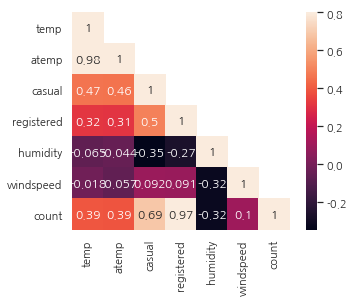

In [118]:
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMat, mask=mask, square=True, annot=True, vmax=.8)

In [125]:
def cym(dtime):
    return "{0}-{1}".format(dtime.year, dtime.month)
train["year_month"] = train["datetime"].apply(cym)
train["year_month"].head()

0    2011-1
1    2011-1
2    2011-1
3    2011-1
4    2011-1
Name: year_month, dtype: object

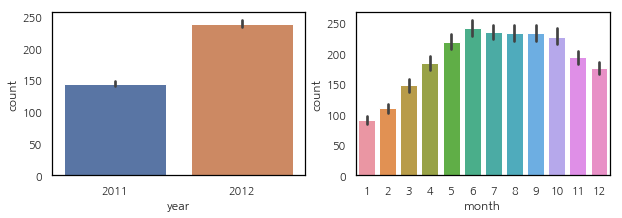

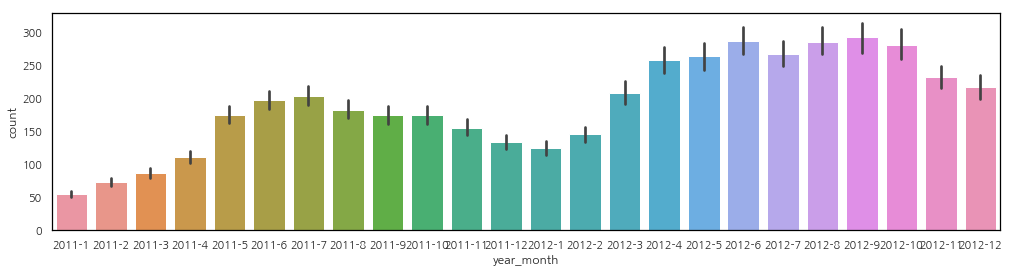

In [138]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10, 3)
sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)

fig, ax3 = plt.subplots()
fig.set_size_inches(17, 4)
sns.barplot(data=train, x="year_month", y="count", ax=ax3)

## outlier 처리|

In [139]:
train["count"]

0         16
1         40
2         32
3         13
4          1
5          1
6          2
7          3
8          8
9         14
10        36
11        56
12        84
13        94
14       106
15       110
16        93
17        67
18        35
19        37
20        36
21        34
22        28
23        39
24        17
25        17
26         9
27         6
28         3
29         2
        ... 
10856    525
10857    353
10858    268
10859    168
10860    132
10861     81
10862     41
10863     15
10864      3
10865      5
10866      7
10867     31
10868    112
10869    363
10870    678
10871    317
10872    164
10873    200
10874    236
10875    213
10876    218
10877    237
10878    334
10879    562
10880    569
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [144]:
# 181*3 표준편차의 3배를 넘으면 outlier 처리
trainWithoutOutlier = train[np.abs(train["count"] - train["count"].mean()) < 3*train["count"].std()]
trainWithoutOutlier.shape

(10739, 20)

In [145]:
train.shape

(10886, 20)

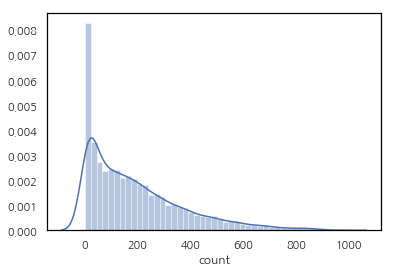

In [146]:
sns.distplot(train["count"])

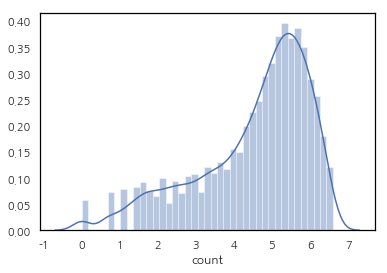

In [148]:
sns.distplot(np.log(trainWithoutOutlier["count"]))

훈련 데이터와 테스트 데이터의 특성을 맞춰줘야 예측이 가능하다 <br><br>

랜덤 포레스트 기반 예측 <br>

In [220]:
train = pd.read_csv("./res/bike-sharing-demand/train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [221]:
test = pd.read_csv("./res/bike-sharing-demand/test.csv", parse_dates=["datetime"])
test.shape

(6493, 9)

In [222]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [223]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 16)

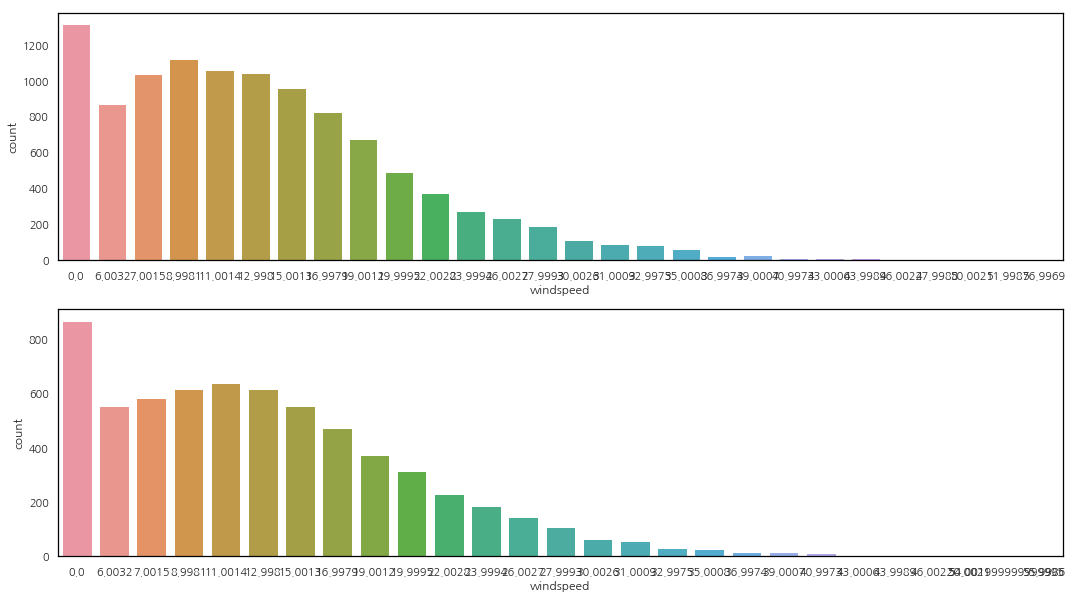

In [224]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18, 10)
sns.countplot(data=train, ax=axes[0], x="windspeed") # 바람 속도에 따른 count
sns.countplot(data=test, ax=axes[1], x="windspeed")
# 두 데이터 모두 풍속이 0인 데이터가 너무 많다

풍속이 0인 값을 일괄적으로 평균으로 대체

In [225]:
# train.loc[train["windspeed"] == 0, "windspeed"] = train["windspeed"].mean()
trainWind0 = train[train["windspeed"] == 0] 
trainWindNot0 = train[train["windspeed"] != 0]
print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 19)
(9573, 19)


In [226]:
# 풍속을 예측하여 결측값 처리
from sklearn.ensemble import RandomForestClassifier

In [227]:
def predict_windspeed(data):
    dataWind0 = data.loc[data["windspeed"]==0]
    dataWindNot0 = data.loc[data["windspeed"]!=0]
    wCol = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]
    
    # 풍속이 0이 아닌 데이터들의 타입을 str로 변경
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
    
    rfModel_wind = RandomForestClassifier()
    # 풍속이 0이 아닌 값으로 모델 생성
    # 모델을 만들 때 사용할 입력 데이터, 출력값
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"]) 
    
    # 풍속이 0인 값들을 예측
    # 바람이 0이 아닌 데이터들의 wCol값들을 학습하여
    # 바람이 0인 데이터들의 windspeed값 예측
    wind0Values = rfModel_wind.predict(X=dataWind0[wCol]) # 예측하고자하는 데이터
    
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    predictWind0["windspeed"] = wind0Values
    data = predictWindNot0.append(predictWind0)
    data["windspeed"] = data["windspeed"].astype("float")
    
    data.reset_index(inplace=True)
    return data
train = predict_windspeed(train)
test = predict_windspeed(test)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCo

In [228]:
print(train)

       index            datetime  season  holiday  workingday  weather   temp  \
0          5 2011-01-01 05:00:00       1        0           0        2   9.84   
1         10 2011-01-01 10:00:00       1        0           0        1  15.58   
2         11 2011-01-01 11:00:00       1        0           0        1  14.76   
3         12 2011-01-01 12:00:00       1        0           0        1  17.22   
4         13 2011-01-01 13:00:00       1        0           0        2  18.86   
5         14 2011-01-01 14:00:00       1        0           0        2  18.86   
6         15 2011-01-01 15:00:00       1        0           0        2  18.04   
7         16 2011-01-01 16:00:00       1        0           0        2  17.22   
8         17 2011-01-01 17:00:00       1        0           0        2  18.04   
9         18 2011-01-01 18:00:00       1        0           0        3  17.22   
10        19 2011-01-01 19:00:00       1        0           0        3  17.22   
11        20 2011-01-01 20:0

In [229]:
print(test)

      index            datetime  season  holiday  workingday  weather   temp  \
0         0 2011-01-20 00:00:00       1        0           1        1  10.66   
1         3 2011-01-20 03:00:00       1        0           1        1  10.66   
2         4 2011-01-20 04:00:00       1        0           1        1  10.66   
3         5 2011-01-20 05:00:00       1        0           1        1   9.84   
4         6 2011-01-20 06:00:00       1        0           1        1   9.02   
5         7 2011-01-20 07:00:00       1        0           1        1   9.02   
6         8 2011-01-20 08:00:00       1        0           1        1   9.02   
7         9 2011-01-20 09:00:00       1        0           1        2   9.84   
8        10 2011-01-20 10:00:00       1        0           1        1  10.66   
9        11 2011-01-20 11:00:00       1        0           1        2  11.48   
10       13 2011-01-20 13:00:00       1        0           1        2  11.48   
11       14 2011-01-20 14:00:00       1 

In [230]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
index         10886 non-null int64
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(16)
memory usage: 1.7 MB


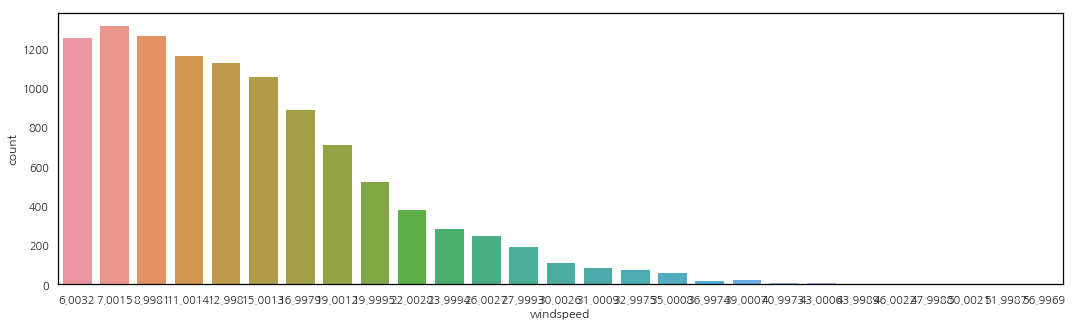

In [234]:
fig, axes = plt.subplots()
fig.set_size_inches(18, 5)
sns.countplot(x=train["windspeed"])

## feature 선택
신호와 잡음 구분 <br>
feature가 무조건 많다고해서 좋은 성능이 보장되지는 않는다 <br>
feature를 하나씩 추가하면서(변경), 성능이 좋지 않은 feature는 제거

In [235]:
train.columns

Index(['index', 'datetime', 'season', 'holiday', 'workingday', 'weather',
       'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'dayofweek'],
      dtype='object')

In [237]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
index         10886 non-null int64
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(16)
memory usage: 1.7 MB


In [242]:
cfn = ["season", "holiday", "workingday", "weather", "dayofweek", "year", "month", "hour"]

In [244]:
for var in cfn:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [245]:
from sklearn.ensemble import RandomForestClassifier

In [247]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100)
# n_jobs = 사용할 core의 개수, -1 = 전부 다 사용하겠다
# n_estimators=생성할 나무의 개수
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [253]:
# 모델 생성
model.fit(train[cfn], train["count"]) 

# submission["count"] = 예측결과
submission = pd.read_csv("./res/bike-sharing-demand/sampleSubmission.csv")
submission["count"] = model.predict(X=test[cfn])

submission

,datetime,count
0,2011-01-20 00:00:00,11
1,2011-01-20 01:00:00,3
2,2011-01-20 02:00:00,4
3,2011-01-20 03:00:00,3
4,2011-01-20 04:00:00,28
5,2011-01-20 05:00:00,72
6,2011-01-20 06:00:00,202
7,2011-01-20 07:00:00,122
8,2011-01-20 08:00:00,45
9,2011-01-20 09:00:00,37


In [256]:
submission.to_csv("./res/bike-sharing-demand/submission.csv", mode="w", index=False)